In [2]:
# Imports here
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
from matplotlib.ticker import FormatStrFormatter
import os

import efficientnet.keras as efn 
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, LambdaCallback
from keras.models import load_model
from keras.models import model_from_json

import cv2

#import pytesseract

from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt





Using TensorFlow backend.
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pirl/anaconda3/envs/edu/lib/p

# **Steps** <p>
Step 1: Load Dataset <p>
Step 2: Transform the Dataset <p>
Step 3: Create Model <p>
Step 4: Train Model <p>
Step 5: Save the Model <p>
Step 6: Load the Model <p>
Step 7: Predict the Image <p>
Step 8: Show the result

## Step 1: Load Dataset

In [2]:
data_dir = "/home/pirl/Project/AiHubCarDataSet/dataset"
img_getsize=240
batchsize=32

## Step 2: Transform the Dataset

In [7]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split=0.3) 

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(data_dir,
                                                 target_size = (img_getsize,img_getsize),
                                                 batch_size = batchsize,
                                                 class_mode = 'categorical',
                                                 subset='training') 

test_set = train_datagen.flow_from_directory(data_dir,
                                            target_size = (img_getsize,img_getsize),
                                            batch_size = batchsize,
                                            class_mode = 'categorical',
                                            subset='validation')






Found 45448 images belonging to 84 classes.
Found 19431 images belonging to 84 classes.


training_set size : 1421
test_set size : 608
train data shape:  (240, 240, 3)
class name 
 {'G4 렉스턴': 0, 'G80 스포츠': 1, 'G90': 2, 'K3': 3, 'K5': 4, 'K7': 5, 'K9': 6, 'KONA 1.6T': 7, 'QM3': 8, 'QM6': 9, 'SM3': 10, 'SM5': 11, 'SM520': 12, 'SM6': 13, 'SM7': 14, 'i30': 15, '그랜저': 16, '그랜저 HG240': 17, '그랜저 IG': 18, '넥스트스파크': 19, '니로 하이브리드': 20, '더뉴그랜드스타렉스': 21, '더뉴레이': 22, '더뉴아반떼 AD': 23, '라세티': 24, '레이': 25, '말리부': 26, '맥스크루즈': 27, '모닝': 28, '모하비': 29, '벨로스터': 30, '볼트': 31, '볼트 EV': 32, '소나타': 33, '소나타 LF': 34, '소나타 LPI': 35, '소나타 NF': 36, '소나타 YF': 37, '소나타 뉴라이즈': 38, '소나타 하이브리드': 39, '스타렉스': 40, '스토닉': 41, '스팅어': 42, '스파크': 43, '스포티지': 44, '스포티지 R': 45, '스포티지 더볼드': 46, '싼타페': 47, '쏘렌토': 48, '쏘울': 49, '쏘울 EV': 50, '아반떼 AD': 51, '아반떼 MD': 52, '아반떼 XD': 53, '아슬란': 54, '아이오닉 일렉트릭': 55, '아이오닉 하이브리드': 56, '알페온': 57, '에쿠스': 58, '엑센트': 59, '올뉴K3': 60, '올뉴모닝': 61, '임팔라': 62, '제네시스 G380': 63, '제네시스 G70': 64, '제네시스 G80': 65, '카니발': 66, '카니발 11인승': 67, '카니발 하이리무진': 68, '카렌스': 69, '캡티바': 70, '코란도 C': 

/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-p

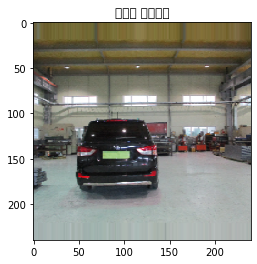

In [4]:
x_train, y_train = training_set[2]
x_train = np.transpose(x_train[0], (0, 1, 2))
cv2.imwrite("./testimgigmi.jpg", x_train[0])

print(f"training_set size : {len(training_set)}")
print(f"test_set size : {len(test_set)}")


print('train data shape: ', x_train.shape)
#print('data', x_train)
print(f"class name \n {training_set.class_indices}")
print(f"class num : {len(y_train[0])}")
class_list =[None] * len(y_train[0])

for car,ind in training_set.class_indices.items():
    class_list[ind]=car
print()
print(f"check smaple ")
car_name=class_list[list(y_train[0]).index(1)]
print('label: ', y_train[0], '\nmodel: ',car_name)

plt.figure()
plt.imshow(x_train)
plt.title(car_name)
plt.show()

## Step 3: Create Model

In [48]:
import efficientnet.keras as efn 
_input = Input(shape=(img_getsize, img_getsize, 3))
_output= len(training_set[0][1][0])
#model = ResNet50(input_tensor=_input, include_top=False, weights=None, pooling='max')
model = efn.EfficientNetB1()

x = model.output
x = Dense(1024, name='fully', init='uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(512, init='uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(_output, activation='softmax', name='softmax')(x)
model = Model(model.input, x)
model.summary()




/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, name="fully", kernel_initializer="uniform")`
  
/home/pirl/anaconda3/envs/edu/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 120, 120, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 120, 120, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 120, 120, 32) 0           stem_bn[0][0]                    
__________________________________________________________________________________________________
block1a_dw

In [49]:
model.compile(loss='categorical_crossentropy',
                  #optimizer=optimizers.RMSprop(lr=2e-4),
                  optimizer=optimizers.adam(),
                  metrics=['acc'])

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[3].get_weights()))
#early_stopping = EarlyStopping(patience=15, mode='auto', monitor='val_loss')
history = model.fit_generator(training_set,
                              steps_per_epoch=25,
                              epochs=200,
                              validation_data=test_set,
                              validation_steps=5,
                              callbacks=[print_weights])

Epoch 1/200
25/25 [==============================] - 73s 3s/step - loss: 4.4992 - acc: 0.0250 - val_loss: 4.4031 - val_acc: 0.0312
[]
Epoch 2/200
25/25 [==============================] - 59s 2s/step - loss: 4.2529 - acc: 0.0600 - val_loss: 4.4515 - val_acc: 0.0500
[]
Epoch 3/200
25/25 [==============================] - 62s 2s/step - loss: 3.9712 - acc: 0.0513 - val_loss: 4.2911 - val_acc: 0.0437
[]
Epoch 4/200
25/25 [==============================] - 61s 2s/step - loss: 3.6083 - acc: 0.1250 - val_loss: 4.1481 - val_acc: 0.0875
[]
Epoch 5/200
25/25 [==============================] - 61s 2s/step - loss: 3.2457 - acc: 0.1613 - val_loss: 4.1700 - val_acc: 0.0437
[]
Epoch 6/200
25/25 [==============================] - 62s 2s/step - loss: 2.9801 - acc: 0.2088 - val_loss: 3.7604 - val_acc: 0.1000
[]
Epoch 7/200
25/25 [==============================] - 62s 2s/step - loss: 2.7816 - acc: 0.2625 - val_loss: 4.0571 - val_acc: 0.0938
[]
Epoch 8/200
25/25 [==============================] - 63s 3s/st

[]
Epoch 62/200
25/25 [==============================] - 53s 2s/step - loss: 0.3581 - acc: 0.8938 - val_loss: 1.1821 - val_acc: 0.7312
[]
Epoch 63/200
25/25 [==============================] - 53s 2s/step - loss: 0.4074 - acc: 0.8650 - val_loss: 1.5635 - val_acc: 0.6438
[]
Epoch 64/200
25/25 [==============================] - 54s 2s/step - loss: 0.4030 - acc: 0.8700 - val_loss: 2.3604 - val_acc: 0.5500
[]
Epoch 65/200
25/25 [==============================] - 53s 2s/step - loss: 0.3892 - acc: 0.8725 - val_loss: 1.5200 - val_acc: 0.6062
[]
Epoch 66/200
25/25 [==============================] - 53s 2s/step - loss: 0.3551 - acc: 0.8912 - val_loss: 1.5997 - val_acc: 0.7000
[]
Epoch 67/200
25/25 [==============================] - 53s 2s/step - loss: 0.3744 - acc: 0.8750 - val_loss: 1.4332 - val_acc: 0.6625
[]
Epoch 68/200
25/25 [==============================] - 54s 2s/step - loss: 0.4258 - acc: 0.8762 - val_loss: 1.9824 - val_acc: 0.5500
[]
Epoch 69/200
25/25 [==============================] 

25/25 [==============================] - 51s 2s/step - loss: 0.2177 - acc: 0.9438 - val_loss: 1.1799 - val_acc: 0.7812
[]
Epoch 183/200
25/25 [==============================] - 50s 2s/step - loss: 0.2251 - acc: 0.9387 - val_loss: 0.8666 - val_acc: 0.8125
[]
Epoch 184/200
25/25 [==============================] - 51s 2s/step - loss: 0.2791 - acc: 0.9213 - val_loss: 1.1889 - val_acc: 0.7750
[]
Epoch 185/200
25/25 [==============================] - 51s 2s/step - loss: 0.2056 - acc: 0.9363 - val_loss: 1.2603 - val_acc: 0.7562
[]
Epoch 186/200
25/25 [==============================] - 51s 2s/step - loss: 0.2477 - acc: 0.9325 - val_loss: 1.2350 - val_acc: 0.7000
[]
Epoch 187/200
25/25 [==============================] - 51s 2s/step - loss: 0.2252 - acc: 0.9300 - val_loss: 0.7456 - val_acc: 0.8688
[]
Epoch 188/200
25/25 [==============================] - 51s 2s/step - loss: 0.2130 - acc: 0.9363 - val_loss: 1.1299 - val_acc: 0.7625
[]
Epoch 189/200
25/25 [==============================] - 51s 2s/

In [56]:
import datetime
day=str(datetime.datetime.today()).split("-")[0]+str(datetime.datetime.today()).split("-")[1]
print(day)

202006


# save model

In [65]:

model.save("efficientnetB1"+day+'.h5')




# load model 

In [5]:
load=load_model("efficientnetB1202006"+'.h5')

Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.


# model evaluation

In [8]:
loss_and_metrics = load.evaluate_generator(test_set, steps=5)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))


loss_and_metrics : [1.3453633785247803, 0.73125]


# predict image

In [5]:
data_dir="/home/pirl/Project/AiHubCarDataSet/dataset"
img_getsize=240
batchsize=32
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(data_dir,
                                            target_size = (img_getsize,img_getsize),
                                            batch_size = batchsize,
                                            class_mode = 'categorical'
                                            )

load=load_model("efficientnetB1202006"+'.h5') # 모델 불러오기 



Found 64879 images belonging to 84 classes.


In [9]:
#accuracry 출력
loss_and_metrics = load.evaluate_generator(test_set, steps=5)
print('')
print('test accucary : ' + str(loss_and_metrics[1]*100))

#라벨링 값 확인
for batch_num in range(len(test100_set)): #데이터 수 / batch 수
    outputs=load.predict(test100_set[batch_num][0]) 
    print(output.shape)
    for i,output in enumerate(outputs):
        #i=np.random.randint(len(test_set))
        f = lambda j: output[j]
        prdict_ind=max(range(len(output)), key=f)
        orig_ind=max(range(len(test_set[batch_num][1])), key=f)
        print(prdict_ind,orig_ind)
        print("predict model ",list(test_set.class_indices.keys())[list(test_set.class_indices.values()).index(prdict_ind)])
        print("real model ", list(test_set.class_indices.keys())[list(test_set.class_indices.values()).index(orig_ind)])

        #plt.figure()
        #plt.imshow(np.transpose(test_set[0][0], (0, 1, 2)))
        #plt.title(car_name)
        #plt.show()


loss_and_metrics : 77.5
